A_std (standaardbasis):
 [[ 2.  1.]
 [ 1. -1.]]

Bmat (basis B):
 [[ 1. -1.]
 [ 1.  2.]]

Cmat (basis C):
 [[1. 1.]
 [0. 1.]]

A_BC (matrix van f t.o.v. B -> C):
 [[ 3.  3.]
 [ 0. -3.]]

Test:
 [v]_B = [-0.65179115 -0.17471729]
 direct [f(v)]_C = [-2.47952533  0.52415188]
 via A_BC [v]_B  = [-2.47952533  0.52415188]
 verschil        = [-4.44089210e-16  1.11022302e-16]


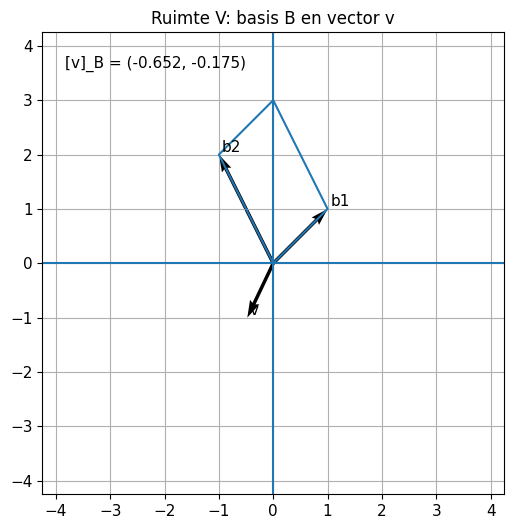

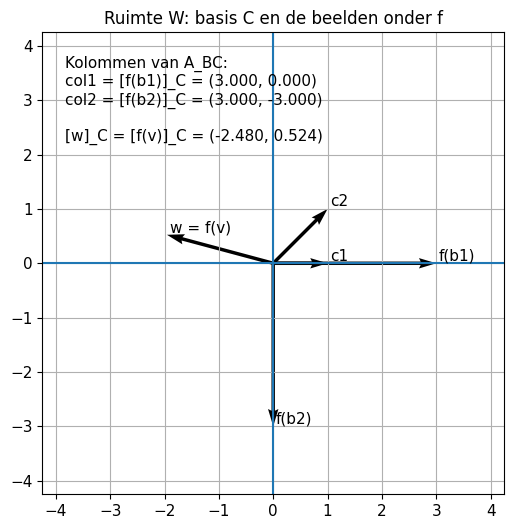

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Visualisatie van Stelling 4.1.8:
#   [f(v)]_C = A_{B->C} [v]_B
# met A_{B->C} = C^{-1} A_std B
# ============================================================

# 1) Lineaire afbeelding f: R^2 -> R^2 in standaardbasis
A_std = np.array([[2, 1],
                  [1, -1]], dtype=float)

# 2) Basissen als kolommenmatrices
#    v = Bmat @ [v]_B
#    w = Cmat @ [w]_C
Bmat = np.array([[ 1, -1],
                 [ 1,  2]], dtype=float)  # basis B = (b1, b2)

Cmat = np.array([[1, 1],
                 [0, 1]], dtype=float)    # basis C = (c1, c2)

# 3) Matrix van f t.o.v. B -> C
A_BC = np.linalg.inv(Cmat) @ A_std @ Bmat

print("A_std (standaardbasis):\n", A_std)
print("\nBmat (basis B):\n", Bmat)
print("\nCmat (basis C):\n", Cmat)
print("\nA_BC (matrix van f t.o.v. B -> C):\n", A_BC)

# 4) Testvector: kies coördinaten in basis B, bouw v, pas f toe
rng = np.random.default_rng(4)
x_B = rng.normal(size=2)          # [v]_B
v = Bmat @ x_B                    # v in standaardcoördinaten
w = A_std @ v                     # w = f(v) in standaardcoördinaten

# Coördinaten van w in basis C
x_C_direct = np.linalg.inv(Cmat) @ w
x_C_via_matrix = A_BC @ x_B

print("\nTest:")
print(" [v]_B =", x_B)
print(" direct [f(v)]_C =", x_C_direct)
print(" via A_BC [v]_B  =", x_C_via_matrix)
print(" verschil        =", x_C_direct - x_C_via_matrix)

# ------------------------------------------------------------
# Plot helpers
# ------------------------------------------------------------
def setup_axes(ax, title):
    ax.set_title(title)
    ax.set_aspect("equal", adjustable="box")
    ax.axhline(0)
    ax.axvline(0)
    ax.grid(True)

def draw_arrow(ax, vec, label, offset=(0.05, 0.05)):
    ax.quiver(0, 0, vec[0], vec[1], angles="xy", scale_units="xy", scale=1)
    ax.text(vec[0] + offset[0], vec[1] + offset[1], label)

# ------------------------------------------------------------
# Figuur 1: Ruimte V met basis B en vector v
# ------------------------------------------------------------
b1, b2 = Bmat[:, 0], Bmat[:, 1]

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
setup_axes(ax1, "Ruimte V: basis B en vector v")

draw_arrow(ax1, b1, "b1")
draw_arrow(ax1, b2, "b2")
draw_arrow(ax1, v, "v")

# Parallellogram opgespannen door b1 en b2
P = np.array([[0, 0],
              b1,
              b1 + b2,
              b2,
              [0, 0]])
ax1.plot(P[:, 0], P[:, 1])

ax1.text(0.05, 0.95, f"[v]_B = ({x_B[0]:.3f}, {x_B[1]:.3f})",
         transform=ax1.transAxes, verticalalignment="top")

allV = np.vstack([b1, b2, v, b1 + b2])
m = np.max(np.abs(allV)) * 1.25 + 0.5
ax1.set_xlim(-m, m)
ax1.set_ylim(-m, m)

plt.show()

# ------------------------------------------------------------
# Figuur 2: Ruimte W met basis C en beelden onder f
# ------------------------------------------------------------
c1, c2 = Cmat[:, 0], Cmat[:, 1]
fb1 = A_std @ b1
fb2 = A_std @ b2

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
setup_axes(ax2, "Ruimte W: basis C en de beelden onder f")

draw_arrow(ax2, c1, "c1")
draw_arrow(ax2, c2, "c2")
draw_arrow(ax2, fb1, "f(b1)")
draw_arrow(ax2, fb2, "f(b2)")
draw_arrow(ax2, w, "w = f(v)")

col1 = A_BC[:, 0]   # = [f(b1)]_C
col2 = A_BC[:, 1]   # = [f(b2)]_C

ax2.text(0.05, 0.95,
         "Kolommen van A_BC:\n"
         f"col1 = [f(b1)]_C = ({col1[0]:.3f}, {col1[1]:.3f})\n"
         f"col2 = [f(b2)]_C = ({col2[0]:.3f}, {col2[1]:.3f})\n\n"
         f"[w]_C = [f(v)]_C = ({x_C_direct[0]:.3f}, {x_C_direct[1]:.3f})",
         transform=ax2.transAxes, verticalalignment="top")

allW = np.vstack([c1, c2, w, fb1, fb2])
m2 = np.max(np.abs(allW)) * 1.25 + 0.5
ax2.set_xlim(-m2, m2)
ax2.set_ylim(-m2, m2)

plt.show()


A_BC =
 [[ 3.  3.]
 [ 0. -3.]]

[v]_B = [-0.65 -0.17]
[f(v)]_C direct   = [-2.46  0.51]
[f(v)]_C via A_BC = [-2.46  0.51]
verschil = [0. 0.]


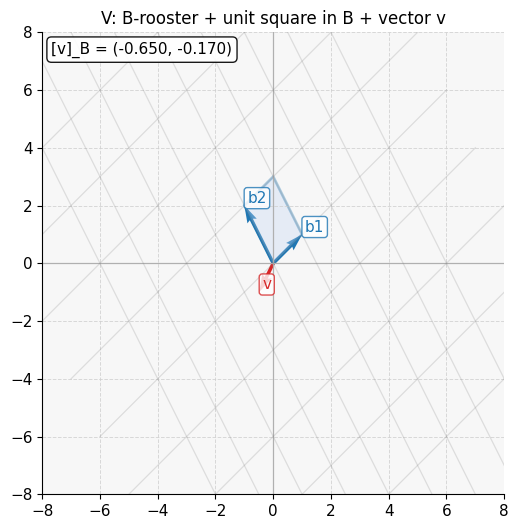

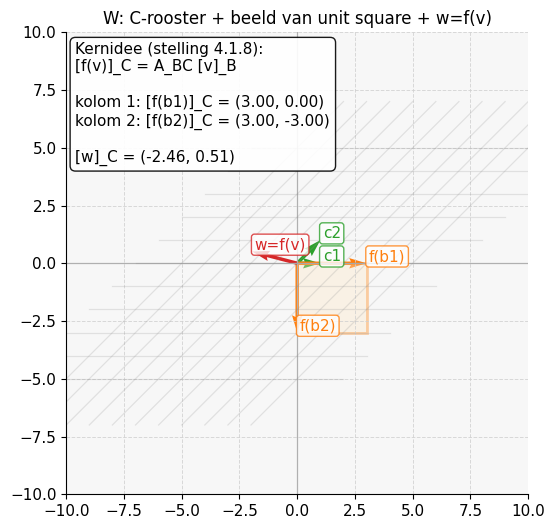

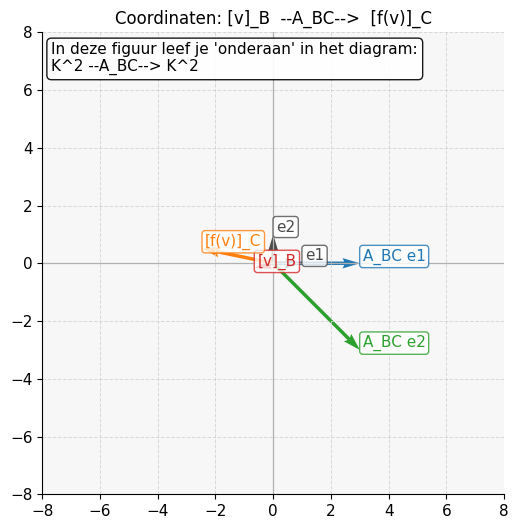

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 0) Definitie van de setup
# ============================

plt.rcParams.update({
    "figure.figsize": (7, 6),
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "font.size": 11,
})

COLORS = {
    "grid": "#7f7f7f",
    "basis_B": "#1f77b4",
    "basis_C": "#2ca02c",
    "vector": "#d62728",
    "image": "#ff7f0e",
    "fill": "#c5d6f2",
}

# Lineaire afbeelding f in standaardcoordinaten (R^2 -> R^2)
A_std = np.array([[2, 1],
                  [1, -1]], dtype=float)

# Basis B in V (kolommen = b1, b2)
Bmat = np.array([[ 1, -1],
                 [ 1,  2]], dtype=float)

# Basis C in W (kolommen = c1, c2)
Cmat = np.array([[1, 1],
                 [0, 1]], dtype=float)

# Sanity checks
assert abs(np.linalg.det(Bmat)) > 1e-12, "B is niet invertibel."
assert abs(np.linalg.det(Cmat)) > 1e-12, "C is niet invertibel."

# Matrix van f t.o.v. B -> C:
# [f(v)]_C = A_BC [v]_B
A_BC = np.linalg.inv(Cmat) @ A_std @ Bmat


"""
1) Helpers voor visualisatie
"""
def setup_axes(ax, title, lim):
    ax.set_title(title)
    ax.set_aspect("equal", adjustable="box")
    ax.axhline(0, color="#b0b0b0", linewidth=0.9)
    ax.axvline(0, color="#b0b0b0", linewidth=0.9)
    ax.grid(True, linestyle="--", linewidth=0.7, color="#d0d0d0", alpha=0.8)
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_facecolor("#f7f7f7")
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)

def draw_arrow(ax, vec, label=None, text_offset=(0.1, 0.1), lw=2.4, color="k"):
    ax.quiver(0, 0, vec[0], vec[1], angles="xy", scale_units="xy", scale=1, linewidth=lw, color=color)
    if label is not None:
        ax.text(vec[0] + text_offset[0], vec[1] + text_offset[1], label, color=color,
                bbox=dict(facecolor="white", edgecolor=color, boxstyle="round,pad=0.2", alpha=0.8))

def draw_basis_grid(ax, basis_mat, kmax=4, tmin=-6, tmax=6, nt=200, alpha=0.18, color=COLORS["grid"]):
    """Coordinatenrooster horend bij basis (b1,b2)."""
    b1 = basis_mat[:, 0]
    b2 = basis_mat[:, 1]
    t = np.linspace(tmin, tmax, nt)
    for a in range(-kmax, kmax + 1):
        pts = (a * b1.reshape(2,1)) + (t * b2.reshape(2,1))
        ax.plot(pts[0], pts[1], alpha=alpha, color=color, linewidth=0.9)
    for b in range(-kmax, kmax + 1):
        pts = (t * b1.reshape(2,1)) + (b * b2.reshape(2,1))
        ax.plot(pts[0], pts[1], alpha=alpha, color=color, linewidth=0.9)

def polygon_from_columns(cols):
    """Maak polygon punten [0, col1, col1+col2, col2, 0]."""
    v1, v2 = cols[:, 0], cols[:, 1]
    return np.array([[0, 0],
                     v1,
                     v1 + v2,
                     v2,
                     [0, 0]], dtype=float)


"""
2) Kies een vector via B-coordinaten
"""
# Pas dit aan om andere v te bekijken:
x_B = np.array([-0.65, -0.17])     # [v]_B

v = Bmat @ x_B                      # v in standaardcoordinaten (in V)
w = A_std @ v                       # w = f(v) in standaardcoordinaten (in W)

x_C = np.linalg.inv(Cmat) @ w       # [w]_C = [f(v)]_C
x_C_check = A_BC @ x_B              # moet gelijk zijn aan x_C

print("A_BC =\n", A_BC)
print("\n[v]_B =", x_B)
print("[f(v)]_C direct   =", x_C)
print("[f(v)]_C via A_BC =", x_C_check)
print("verschil =", x_C - x_C_check)


"""
3) Figuur 1: V met B-grid
"""
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
setup_axes(ax1, "V: B-rooster + unit square in B + vector v", lim=8)

# B-grid
draw_basis_grid(ax1, Bmat, kmax=4, tmin=-6, tmax=6, alpha=0.22)

# Basisvectoren en unit square in B
b1, b2 = Bmat[:, 0], Bmat[:, 1]
draw_arrow(ax1, b1, "b1", color=COLORS["basis_B"])
draw_arrow(ax1, b2, "b2", color=COLORS["basis_B"])

P_B = polygon_from_columns(Bmat)
ax1.fill(P_B[:, 0], P_B[:, 1], facecolor=COLORS["fill"], edgecolor=COLORS["basis_B"], linewidth=2, alpha=0.35)

# Vector v
draw_arrow(ax1, v, "v", lw=3, color=COLORS["vector"])

ax1.text(0.02, 0.98, f"[v]_B = ({x_B[0]:.3f}, {x_B[1]:.3f})",
         transform=ax1.transAxes, va="top", ha="left",
         bbox=dict(facecolor="white", alpha=0.9, boxstyle="round,pad=0.3"))
plt.show()


"""
4) Figuur 2: W met C-grid + beelden
"""
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
setup_axes(ax2, "W: C-rooster + beeld van unit square + w=f(v)", lim=10)

# C-grid
draw_basis_grid(ax2, Cmat, kmax=5, tmin=-7, tmax=7, alpha=0.22, color="#909090")

# Basisvectoren c1,c2
c1, c2 = Cmat[:, 0], Cmat[:, 1]
draw_arrow(ax2, c1, "c1", color=COLORS["basis_C"])
draw_arrow(ax2, c2, "c2", color=COLORS["basis_C"])

# Beelden van b1,b2 en unit square
fb1 = A_std @ b1
fb2 = A_std @ b2
draw_arrow(ax2, fb1, "f(b1)", lw=3, color=COLORS["image"])
draw_arrow(ax2, fb2, "f(b2)", lw=3, color=COLORS["image"])

# Beeld van de unit square: corners (0, b1, b1+b2, b2)
P_img = np.array([[0, 0],
                  fb1,
                  fb1 + fb2,
                  fb2,
                  [0, 0]], dtype=float)
ax2.fill(P_img[:, 0], P_img[:, 1], facecolor="#ffe6c6", edgecolor=COLORS["image"], linewidth=2, alpha=0.35)

# w = f(v)
draw_arrow(ax2, w, "w=f(v)", lw=4, color=COLORS["vector"])

# Laat zien dat kolommen van A_BC de C-coordinaten van f(b1), f(b2) zijn
col1 = A_BC[:, 0]
col2 = A_BC[:, 1]
ax2.text(0.02, 0.98,
         "Kernidee (stelling 4.1.8):\n"
         "[f(v)]_C = A_BC [v]_B\n\n"
         f"kolom 1: [f(b1)]_C = ({col1[0]:.2f}, {col1[1]:.2f})\n"
         f"kolom 2: [f(b2)]_C = ({col2[0]:.2f}, {col2[1]:.2f})\n\n"
         f"[w]_C = ({x_C[0]:.2f}, {x_C[1]:.2f})",
         transform=ax2.transAxes, va="top", ha="left",
         bbox=dict(facecolor="white", alpha=0.9, boxstyle="round,pad=0.35"))
plt.show()


"""
5) Figuur 3: Coordinatenruimte (K^2)
"""
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
setup_axes(ax3, "Coordinaten: [v]_B  --A_BC-->  [f(v)]_C", lim=8)

# Teken standaardbasis e1,e2 in coordinatenruimte
e1 = np.array([1.0, 0.0])
e2 = np.array([0.0, 1.0])
draw_arrow(ax3, e1, "e1", color="#4c4c4c")
draw_arrow(ax3, e2, "e2", color="#4c4c4c")

# Teken [v]_B en zijn beeld A_BC[v]_B = [f(v)]_C
draw_arrow(ax3, x_B, "[v]_B", lw=3, color=COLORS["vector"])
draw_arrow(ax3, x_C, "[f(v)]_C", lw=3, color=COLORS["image"])

# Teken ook de kolommen van A_BC als beelden van e1,e2
draw_arrow(ax3, A_BC @ e1, "A_BC e1", lw=2.5, color=COLORS["basis_B"])
draw_arrow(ax3, A_BC @ e2, "A_BC e2", lw=2.5, color=COLORS["basis_C"])

ax3.text(0.02, 0.98, "In deze figuur leef je 'onderaan' in het diagram:\n"
                     "K^2 --A_BC--> K^2",
         transform=ax3.transAxes, va="top", ha="left",
         bbox=dict(facecolor="white", alpha=0.9, boxstyle="round,pad=0.3"))
plt.show()

Diagram voor 4.2.6:

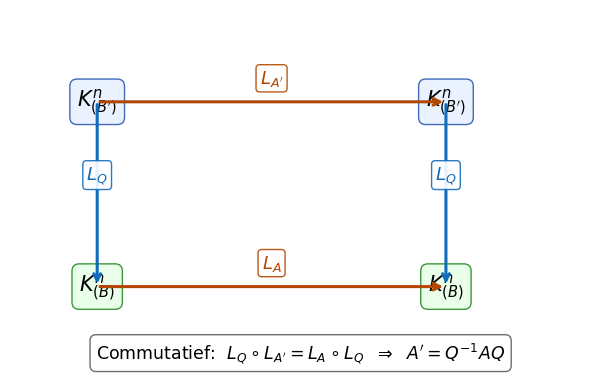

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (7.5, 4.8),
    "font.size": 12,
})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis("off")
ax.set_facecolor("#f7f7f7")

# Posities van de knopen (in figure-coordinates)
p_tl = (0.15, 0.75)  # top-left
p_tr = (0.75, 0.75)  # top-right
p_bl = (0.15, 0.25)  # bottom-left
p_br = (0.75, 0.25)  # bottom-right

# Kleine helper om nodes te tekenen
def node(pos, label, facecolor="#ffffff", edgecolor="#4c4c4c"):
    ax.text(*pos, label, ha="center", va="center", fontsize=15, weight="bold",
            bbox=dict(facecolor=facecolor, edgecolor=edgecolor, boxstyle="round,pad=0.35", alpha=0.92))

# Labels voor de vier K^n-ruimtes
node(p_tl, r"$K^n_{(B')}$", facecolor="#e9f0ff", edgecolor="#2f5fb3")
node(p_tr, r"$K^n_{(B')}$", facecolor="#e9f0ff", edgecolor="#2f5fb3")
node(p_bl, r"$K^n_{(B)}$",  facecolor="#e8ffe9", edgecolor="#2c8c2c")
node(p_br, r"$K^n_{(B)}$",  facecolor="#e8ffe9", edgecolor="#2c8c2c")

# Pijlen + labels
def arrow(a, b, label, color="#444", dy=0.05):
    ax.annotate("", xy=b, xytext=a, arrowprops=dict(arrowstyle="->", lw=2.2, color=color))
    ax.text((a[0] + b[0]) / 2, (a[1] + b[1]) / 2 + dy, label, ha="center", fontsize=13, color=color,
            bbox=dict(facecolor="white", edgecolor=color, boxstyle="round,pad=0.2", alpha=0.9))

arrow(p_tl, p_tr, r"$L_{A'}$", color="#b34700")
arrow(p_bl, p_br, r"$L_A$",  color="#b34700")
arrow(p_tl, p_bl, r"$L_Q$",  color="#0f6cbd", dy=0.04)
arrow(p_tr, p_br, r"$L_Q$",  color="#0f6cbd", dy=0.04)

ax.text(0.5, 0.07, r"Commutatief:  $L_Q \circ L_{A'} = L_A \circ L_Q$  $\Rightarrow$  $A' = Q^{-1} A Q$",
        ha="center", va="center", fontsize=12.5, bbox=dict(facecolor="#ffffff", edgecolor="#666", boxstyle="round,pad=0.35", alpha=0.95))

plt.show()

---

## Stelling 4.2.8

---

Originele A:
 [[1. 1.]
 [2. 2.]]
Singular values: [3.16227766e+00 1.57009246e-16]
Rank k = 1
Canonieke vorm A_can = P^{-1} A Q:
 [[1.00000000e+00 4.26642159e-17]
 [3.14018492e-16 0.00000000e+00]]
A @ b2 = [0. 0.]


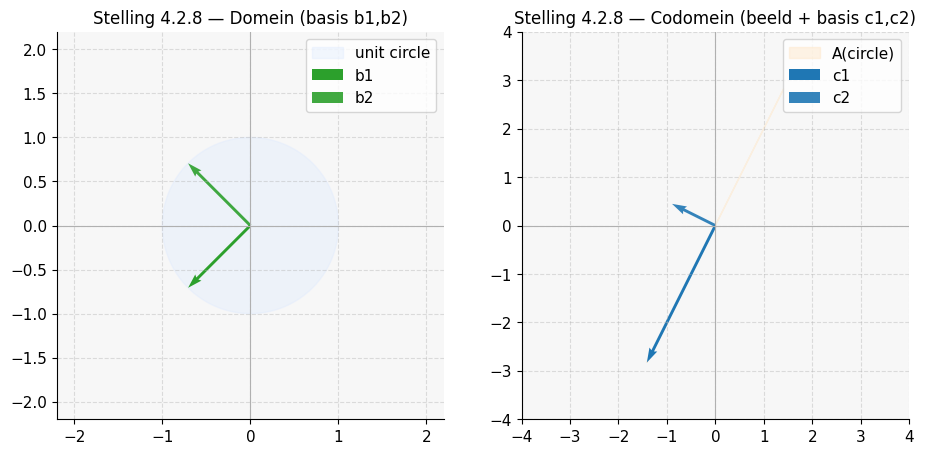

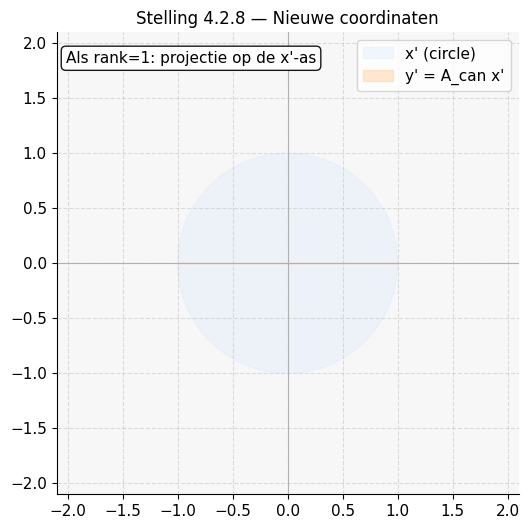

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.figsize": (6.8, 6.0),
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "font.size": 11,
})

COL = {
    "domain": "#1f77b4",
    "codomain": "#ff7f0e",
    "basis": "#2ca02c",
    "grid": "#b0b0b0",
    "fill": "#dce9ff",
    "proj": "#8c564b",
}

def canonical_form(A, tol=1e-10):
    """Vind P (m×m) en Q (n×n) zodat A_can = P^{-1} A Q ≈ [[I_k,0],[0,0]]."""
    U, s, VT = np.linalg.svd(A, full_matrices=True)
    m, n = A.shape
    k = int(np.sum(s > tol))
    Q = VT.T
    D = np.ones(m)
    D[:k] = s[:k]
    P = U @ np.diag(D)
    A_can = np.linalg.inv(P) @ A @ Q
    return A_can, P, Q, k, s

def beautify(ax, title, lim):
    ax.set_title(title)
    ax.set_aspect("equal", adjustable="box")
    ax.axhline(0, color=COL["grid"], lw=0.8)
    ax.axvline(0, color=COL["grid"], lw=0.8)
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_facecolor("#f7f7f7")
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)
    ax.grid(True, linestyle="--", alpha=0.4)

def plot_map_and_bases(A, P, Q, title=""):
    assert A.shape == (2, 2), "Deze plotfunctie is bedoeld voor 2D -> 2D."
    theta = np.linspace(0, 2*np.pi, 400)
    X = np.vstack([np.cos(theta), np.sin(theta)])
    Y = A @ X

    b1, b2 = Q[:, 0], Q[:, 1]
    c1, c2 = P[:, 0], P[:, 1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5.5))

    # Domein
    beautify(ax1, title + "Domein (basis b1,b2)", lim=2.2)
    ax1.fill(X[0], X[1], color=COL["fill"], alpha=0.35, label="unit circle")
    ax1.quiver(0, 0, b1[0], b1[1], angles="xy", scale_units="xy", scale=1, color=COL["basis"], label="b1")
    ax1.quiver(0, 0, b2[0], b2[1], angles="xy", scale_units="xy", scale=1, color=COL["basis"], alpha=0.9, label="b2")
    ax1.legend(loc="upper right")

    # Codomein
    beautify(ax2, title + "Codomein (beeld + basis c1,c2)", lim=4.0)
    ax2.fill(Y[0], Y[1], color="#ffe6c6", alpha=0.45, label="A(circle)")
    ax2.quiver(0, 0, c1[0], c1[1], angles="xy", scale_units="xy", scale=1, color=COL["domain"], label="c1")
    ax2.quiver(0, 0, c2[0], c2[1], angles="xy", scale_units="xy", scale=1, color=COL["domain"], alpha=0.9, label="c2")
    ax2.legend(loc="upper right")

def plot_canonical_action(A_can, title=""):
    assert A_can.shape == (2, 2), "Deze plotfunctie is bedoeld voor 2D -> 2D."
    theta = np.linspace(0, 2*np.pi, 400)
    Xp = np.vstack([np.cos(theta), np.sin(theta)])
    Yp = A_can @ Xp

    fig, ax = plt.subplots(figsize=(6, 6))
    beautify(ax, title + "Nieuwe coordinaten", lim=2.1)
    ax.fill(Xp[0], Xp[1], color=COL["fill"], alpha=0.35, label="x' (circle)")
    ax.fill(Yp[0], Yp[1], color="#ffd8b1", alpha=0.6, label="y' = A_can x'")
    ax.legend(loc="upper right")
    ax.text(0.02, 0.96, "Als rank=1: projectie op de x'-as", transform=ax.transAxes, va="top", ha="left",
            bbox=dict(facecolor="white", alpha=0.9, boxstyle="round,pad=0.3"))

# -------------------------
# Voorbeeld: rank-1 matrix die alles op een lijn projecteert
A = np.array([[1.0, 1.0],
              [2.0, 2.0]])

A_can, P, Q, k, s = canonical_form(A)

print("Originele A:\n", A)
print("Singular values:", s)
print("Rank k =", k)
print("Canonieke vorm A_can = P^{-1} A Q:\n", A_can)

# Check: bij rank 1 zit b2 in de kern
b2 = Q[:, 1]
print("A @ b2 =", A @ b2)

plot_map_and_bases(A, P, Q, title="Stelling 4.2.8 — ")
plot_canonical_action(A_can, title="Stelling 4.2.8 — ")

plt.show()